# <span style='color: lightcoral;'> 몬티 홀 문제(The Monty Hall Problem)</span>

이 강의에서는 유명한 몬티 홀 문제를 살펴보며 직관과 차이가 있는 확률의 성격을 확인합니다. 이 문제는 언뜻 보면 매우 사소해 보이지만, 확률이 처음 예상과 다른 값을 가질 수 있다는 점을 보여줍니다. 

실습에 필요한 라이브러리를 가져오는 것부터 시작하세요.

- 라이브러리 utils에는 쥬피터 노트북에서 직접 실험할 수 있게 도와주는 함수들이 미리 작성되어 있습니다. 관심있는 학생들은 코드를 참고하며 공부해 보는 것도 좋은 방법입니다. 

In [2]:
import numpy as np
import utils
import matplotlib.pyplot as plt

%matplotlib widget

### <span style='color: blue;'>1. 문제 소개</span>

게임을 하여 자동차를 얻을 수 있는 TV 쇼에 여러분이 출연하고 있다고 가정해 보십시오. 게임의 규칙은 최종적으로 세 개의 닫힌 문 중 하나를 선택하는 것인데, 한 문 뒤에는 차가 있고 다른 두 문 뒤에는 염소가 있습니다. 

- 게임은 세 단계로 진행됩니다. 

**(단계1)** 진행자가 세 개의 문 중 하나를 선택하라고 하면 출연자는 세 개 중 문 하나를 선택합니다.(아직은 문을 열어 확인하지 않습니다.) 

**(단계2)** 그러면 차의 위치를 아는 진행자는 남은 두 개의 문 중 하나를 선택하고 문을 열면 염소가 드러납니다.

<figure>
<p align = 'center'>
<img src="image/monty_hall_doors.svg" width="300">
<figcaption>Monty Hall Problem - from Wikipedia</figcaption>
</p>

</figure>


**(단계3)** 이제 최후의 선택을 하는 순간입니다. 예를 들어, (단계1)에서 1번 문을 선택했었다고 가정해보죠. 

차가 어느 문 뒤에 있는지 이미 알고 있는 진행자는 (단계2)에서 3번 문을 열어 염소 한 마리가 등장한 상황입니다. 그런 다음 진행자는 다음과 같이 묻습니다.

**"선택한 문을 2번 문으로 바꾸시겠습니까?"** 

이 질문은 의심스러워 보입니다. 아마도 진행자가 여러분을 속여 잘못 선택하도록 하려는 것일 수도 있습니다. 

선택한 문을 바꾸는 것이 좋을까요? 아니면 1번 문을 고수하는 것이 좋을까요? 

확률과 통계에 익숙해지면, 이길 확률이 가장 높은 선택을 하면 됩니다. 실제 계산을 통해 확률을 확인하기 전에 파이썬을 통해 이 게임을 시뮬레이션하고 옳은 선택을 유추해보죠. 우선, 바로 아래 셀에서 실시간으로 게임을 시도해보면서 짐작을 해 봅시다!

## <span style='color: blue'>2. 몬티 홀 게임 시뮬레이션으로 체험하기 </span>


다음 셀을 실행하면서 잠깐 동안 게임을 체험해 봅시다. 실행결과로 왼쪽에 게임이 표시되며, 체험하는 요령은 다음과 같습니다.

- 게임을 새로 시작하려면 사용 가능한 문 세 개 중 하나를 클릭하여 선택하면 됩니다. 
$$ $$

- 문을 선택하면, 정답을 알고 있는 컴퓨터 프로그램은 나머지 두 문 중 하나를 열고 그 뒤에는 항상 염소가 있습니다. 
$$ $$

- 그런 다음 계속 머물 것인지, 아니면 문을 바꿀 것인지 해당 문을 클릭하여 결정할 수 있습니다.
$$ $$

- 컴퓨터 프로그램이 열어준 문을 선택하면 해당 게임은 포함되지 않습니다.
$$ $$

- 게임 도중, 문 사이의 공간을 클릭하면 게임이 다시 시작되며 전체 결과 계산에 포함되지 않습니다. 
$$ $$

- 차가 있는 문이 확인된 후(게임 종료) 문 사이의 흰 부분 아무 곳이나 클릭하여 게임을 다시 시작하세요.
$$ $$

- 시도한 게임 수를 초기화 하려면 셀을 다시 실행하세요.


아래 셀 실행 후, 오른쪽에 보이는 그림은 시도한 게임 수에 따라 두 전략(선택 유지 또는 선택 변경)의 성공률을 보여줍니다. 몇 번 시도해보고 어떤 전략이 더 유리할 지 예상해 봅시다.

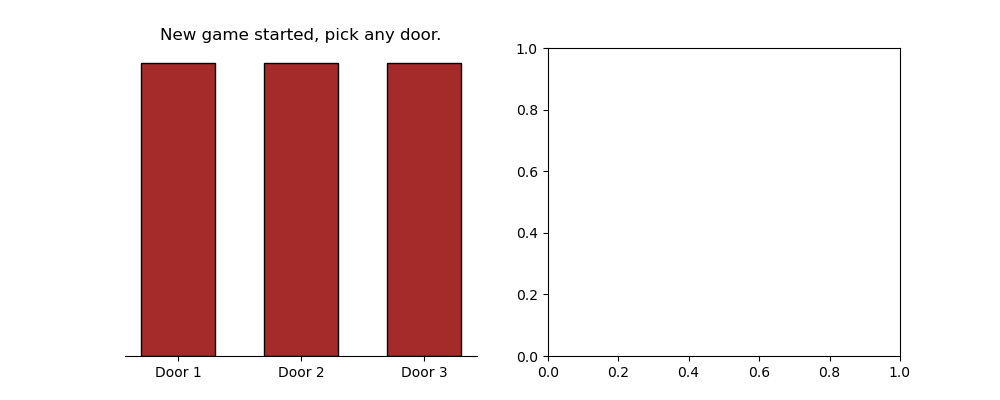

In [4]:
game = utils.monty_hall_game()

<span style='color: coral;'>다음으로 넘어가기 전에 좋은 전략을 예측하기에 충분한 시간 동안 게임을 반복했는지 확인하세요. </span>

> 문을 바꾸는 것이 더 좋은 전략인가요? 처음 선택을 유지하는 것이 더 좋은 전략인가요? 아니면 별 차이가 없나요?

## <span style='color: blue'>3. 충분히 많은 횟수의 시뮬레이션을 위해 코드 작성하기 </span>

- 실제 게임을 반복하면서 나름의 전략을 세웠겠지만, 옳은 전략이라고 확신하기에는 게임의 반복 횟수가 부족합니다. 
$$ $$

- 충분히 많은 횟수를 반복하면서 전략에 대한 확신을 갖기 위해 `monty_hall` 함수를 직접 작성해 보죠. 

    > - 이 함수의 입력은 문을 전환할지 여부를 결정하는 부울 값을 갖는 입력 인자 `switch`입니다.  
    (`True`이면 선택을 바꾸는 전략, `False`이면 선택을 유지하는 전략)
    $$ $$
    > - 문을 넘파이 배열로 표현하고, 염소는 `0`, 자동차는 `1`로 표현합니다.

In [4]:
def monty_hall(switch):

    # 모든 문 뒤에 염소가 있는 것으로 초기화
    doors = np.array([0, 0, 0])

    # 차가 있는 문을 랜덤하게 선택
    winner_index = np.random.randint(0, 3)

    # 랜덤하게 선택된 문 뒤에 차를 배치
    doors[winner_index] = 1

    # 출연자의 선택을 랜덤하게 선택
    choice = np.random.randint(0, 3)

    # 진행자가 열 수 있는 문 설정 (진행자는 출연자가 선택한 문과 뒤에 차가 있는 문은 열 수 없음)
    openable_doors = [i for i in range(3) if i not in (winner_index, choice)]

    # 진행자가 규칙에 맞게 열 문을 선택
    door_to_open = np.random.choice(openable_doors)

    # 부울 값을 갖는 `switch`에 따라 최종 문 선택 
    #(`switch`가 `True`일 때, 선택할 수 있는 문은 처음에 한 선택도 아니고 열린 문도 아니어야 함)
    if switch:
        choice = [i for i in range(3) if i not in (choice, door_to_open)][0]

    # 열린 문에 차가 있으면 `1`을 반환, 염소가 있으면 `0`을 반환 
    return doors[choice]

- 이제 함수 `monty_hall`을 이용하여 간편하게 한 번 게임하는 상황을 시뮬레이션할 수 있습니다. 
 > 시뮬레이션을 좀 해 본 후 이 함수의 의미를 다시 살펴보도록 하죠. 

In [4]:
monty_hall(True) 

1

In [5]:
# 이 셀을 여러 번 실행하면서 결과가 바뀌는 것을 관찰 : 
# 동일한 입력 인자 값(예를 들어, `True`)에 대해서도 매번 다른 값 `1` 또는 `0`을 반환 함 --> 확률변수

monty_hall(3) # 파이썬에서는 `True` 대신 `0`이 아닌 어떤 수를 입력해도 `True`를 입력하는 것과 마찬가지

1

- <span style='color:orange'> 이제 `monty_hall` 함수의 의미를 좀 더 엄밀하게 말해보죠. </span>
 >- 함수 `monty_hall`의 입력 인자 `switch`에 따라 게임에 이길 확률이 달라진다는 것이 우리의 가정입니다. 
 >- 예를 들어, `switch`를 `True`로 고정하면, 항상 최종 선택을 바꾸는 전략에 대해 게임에 이길 확률이 $\mu$로 정해진다고 가정하는 것이죠. 
 >- 이때, <span style='color:orange'>함수 `monty_hall`은 게임에서 이기면 `1`, 지면 `0`의 값을 정해진 $\mu$에 따라 랜덤하게 반환하는 함수이므로 `베르누이 분포`를 따르는 확률변수 $X$</span>로 생각할 수 있습니다. 이때, 확률변수 $X$의 기댓값은 $\text{E}(X)=\mu$입니다. 
 
- <span style='color:orange'> `monty_hall` 함수를 이용하여 (확률이 일정한 동일) 게임을 $n$번 독립적으로 반복하여 나온 결과값 $x_1,\cdots,x_n$의 평균을 구한다면, 그 값은 표본평균(확률변수)
    $$\overline{X}_n=\dfrac{X_1+\cdots+X_n}n$$
의 값이 되고, </span> 기댓값과 분산은 각각 다음과 같습니다. 
$$
\text{E}(\overline{X}_n)=\mu,\quad \text{V}(\overline{X}_n)=\dfrac{\mu(1-\mu)}{n}$$
 >- 따라서, $n$이 커지면 $\text{V}(\overline{X}_n)$이 $0$으로 수렴하므로, 확률변수 $\overline{X}_n$의 분포는 평균 $\mu$ 주변에 몰려있게 됩니다. 
 >- 즉, 직관적으로 <span style='color:orange'>$\overline{X}_n$은 $n$이 커짐에 따라 상수함수 $\mu$로 수렴한다는 것이죠.</span>  
 (표본평균은 확률변수(함수)이므로 여기서 수렴한다는 것은 함수열 $\{\overline{X}_n\}$이 상수함수로 수렴한다는 의미입니다. 
 함수열이 수렴한다는 말을 하려면 두 함수가 가까워진다는 것을 정의해야 하는데, 정의역의 모든 점에서 두 함수의 함숫값이 가까워지는 것으로 이해할 수도 있고, 두 함수 사이의 넓이가 $0$이 되는 것으로 정의할 수도 있고 다양한 방법이 있습니다. 이처럼 두 함수가 가까워진다는 것을 어떻게 정의하느냐에 따라 
 $$\overline{X}_n \to \mu \text{ as }n\to \infty$$
의 의미를 분명하게 정하게 되는데, 이것이 통계학에서 배우는 다양한 `큰수의 법칙` 입니다. 

- 이제 입력 인자 `n`에 대해 `monty_hall`함수를 $n$번 반복해서 나온 값의 평균을 구하는 함수 `success_rate`를 구현하면, 
<span style='color:orange'> 표본평균 $\overline{X}_n$을 구현한 것</span>이 됩니다.

- $n$이 커짐에 따라 $\overline{X}_n$이 어떤 값으로 수렴하는 것을 시뮬레이션을 통해 관찰할 수 있습니다. 실제 코드를 작성하기 전에 미리 작성해 둔 
`utils` 모듈을 이용해서 체험부터 해보죠.

- 함수 `monty_hall`을 이용하여  $n$이 1, 10, 100 및 1000인 표본에 대한 $\overline{X}_n$의 값을 시뮬레이션 한 결과를 아래 셀을 실행시켜 확인해 보세요.
$$ $$
- 시뮬레이션 하는 방법: 아래 셀을 실행시킨 후, 
    > 최종 선택을 바꾸는 전략을 택할 지 여부를 체크 박스를 선택하여 설정하고
    $$ $$
    > `#iterations`의 버튼을 움직여 원하는 횟수에 맞춘 다음
    $$ $$
    > `Run Interact`를 누르면 성공 비율을 확인할 수 있습니다. 

In [6]:
utils.success_rate_plot(monty_hall) # 여기서 simulations 횟수는 표본의 크기를 의미함

interactive(children=(RadioButtons(description='Switch Doors?', index=1, options=(True, False), value=False), …

## <span style='color: blue'>4. 선택한 전략에 대한 시뮬레이션으로 얻은 성공 비율이 수렴하는지 확인 </span>

- 위 실험에서 어느 정도 확신이 생겼나요? 
$$ $$
- 간단한 코드를 이용하여 각 전략(`switch 값`) 별로 시행 횟수에 대한 성공비율(즉, 표본평균의 $\overline{X}_n$의 관측값)이 수렴하는지 시각적으로 관찰해 봅시다. 
 > <span style='color:orange'>아래에 작성하는 함수 `success_rate`는 다음을 구현한 것: </span>
 `switch`를 고정하면 주어진 전략에 대한 게임의 미지의 확률이 정해지고, 이 분포를 따르는 확률변수 `f`에 대해 표본의 크기가 $n=$ `n_iterations`인 표본평균 $\overline{X}_n$의 (관측값)을 반환하는 함수  

In [7]:
def success_rate(n_iterations, switch=True, f=monty_hall):  # 뒤에 활용을 위해 `f=monty_hall`을 사용
    wins = 0
    for _ in range(n_iterations):
        wins += f(switch=switch)
    return wins/n_iterations

In [8]:
xlist = range(100,10000,100)

result_true = [success_rate(n) for n in xlist]
result_false = [success_rate(n,switch=False) for n in xlist]   # 실행시간 1분 이내

In [9]:
result_true[-1:-10:-1]

[0.6714141414141415,
 0.6629591836734694,
 0.6675257731958762,
 0.6710416666666666,
 0.6663157894736842,
 0.6631914893617021,
 0.6676344086021505,
 0.6671739130434783,
 0.6742857142857143]

In [10]:
result_false[-1:-10:-1]

[0.3326262626262626,
 0.325,
 0.3325773195876289,
 0.32729166666666665,
 0.3331578947368421,
 0.3371276595744681,
 0.3365591397849462,
 0.3428260869565217,
 0.33]

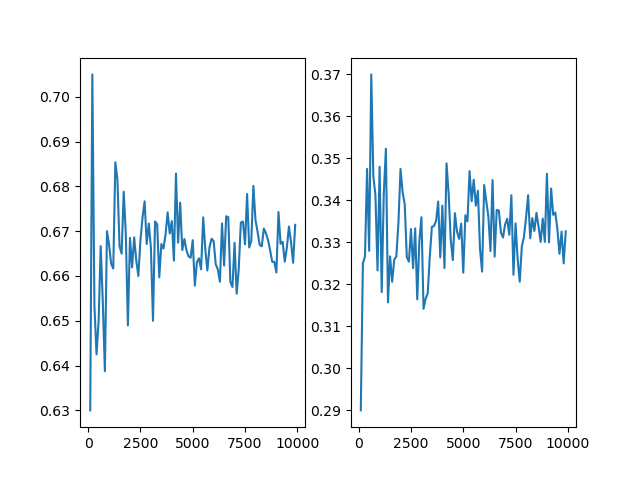

In [11]:
fig,axes = plt.subplots(nrows=1, ncols=2)

axes[0].plot(xlist, result_true)
axes[1].plot(xlist, result_false)

- 대략 표본의 크기 $n$이 $n\ge 1000)$정도이면 최종 선택을 바꾸는 전략에 대해 성공비율이 $0.66\sim 0.68$사이에 있음을 위 그래프로부터 확인할 수 있습니다. 

> 앞에서 설명한 바와 같이 $n\to 0$일 때, $\text{V}(\overline{X}_n)\to 0$이므로 좀 더 큰 $n$을 잡으면 $\overline{X}_n$의 관측값이 움직이는 범위는 $0.66\sim 0.68$보다 작아지고, $\text{E}(\overline{X}_n)=\mu$의 근삿값을 좀 더 정확하게 구할 수 있다. 

In [12]:
# 최종 선택을 바꿀 때 게임에 이길 확률의 n=1000000일 때 근삿값을 실제로 알려진 확률 2/3과 비교
success_rate(10**6)           #결과 나오는 시간 1분 이내

0.665725

## <span style='color: blue'>5. 실제 계산을 통한 확인</span>

시뮬레이션 결과 승리할 확률이 대략 0.67정도인 것으로 추측되므로, 몬티홀 문제에 대해 좋은 전략은 **문을 바꾸는 것**이라는 강력한 증거를 얻었습니다. 
이제 항상 최종 선택을 처음과 달리 바꾸는 전략을 선택할 때, 게임에서 이길 확률을 실제 계산을 통해 확인해보세요. 

위키피디어에 이 전략으로 게임에 이길 확률이 $\dfrac 2 3$이라는 것을 증명하는 여러 가지 방법이 잘 설명되어 있습니다. 이 내용을 읽고 이해해 보세요.
[링크](https://en.wikipedia.org/wiki/Monty_Hall_problem) 

## <span style='color: blue'>6. 일반화된 몬티 홀 문제</span>

몬티 홀 문제에서 다음 두 가지 상황만 바꾼 문제를 일반화된 몬티 홀 문제라고 합니다. 

   > - 문 $3$개를 $n$개로 바꾼다.  
    $$ $$
   > - 출연자가 처음에 문을 하나 선택한 후 진행자가 열어서 차가 없음을 확인시키는 문의 개수는 $k$개로 바꾼다.   

이 경우, 마지막에 선택을 바꾸는 전략으로 게임에 이길 확률 $\frac{n-1}{n} \cdot \frac{1}{n-k-1}$, 선택을 유지하는 전략으로 게임에 이길 확률은 $\frac{1}{n}$ 임이 보일 수 있습니다. 

   > $k=0$인 경우, 다시 말해 진행자가 문을 열지 않는 경우를 제외하면 일반화된 몬티 홀 문제에서도 최종 선택을 바꾸는 전략이 항상 유리하다는 의미입니다. 


### <span style='color: lightcoral;'> 시뮬레이션을 통해 확률의 근삿값을 구할 수 있도록 코드를 작성해 봅시다.</span>

In [13]:
def generalized_monty_hall(switch, n = 3, k = 1):
    if not (1 <= k <= n-2):
        raise ValueError('진행자는 적어도 선택되지 않은 문 하나를 남겨야 하므로, k는 1과 (n-2)사이의 수라야 합니다.')
    
    # 모든 문 뒤에 염소가 있는 것으로 초기화
    doors = np.array([0 for _ in range(n)])
    
    # 뒤에 차가 있는 문을 랜덤하게 지정
    winner = np.random.randint(0,n)

    # 차를 `1`로 표현
    doors[winner] = 1.0
    
    # 출연자가 선택하는 문(랜덤하게 지정)
    choice = np.random.randint(0,n)
    
    # 진행자가 열 수 있는 문
    openable_doors = [i for i in range(n) if i not in (winner, choice)]
    
    # 진행자가 열 수 있는 문 중 k개를 랜덤하게 여는 상황
    door_to_open = np.random.choice(openable_doors, size = k, replace = False)
    
    # 출연자가 최종 선택을 바꿀 때, 가능한 문 중 랜덤하게 선택
    if switch:
        choices = [i for i in range(n) if i not in np.array(choice) and i not in np.array(door_to_open)]
        
        choice = np.random.choice(choices)
    
    # 차가 있는 문을 선택하면 `1`을 반환, 그렇지 않으면 `0`을 반환
    return doors[choice]

- `generalized_monty_hall` 함수에 맞게 `success_rate` 함수를 다시 작성해도 되지만, 이미 작성한 함수를 활용할 수 있도록 `f_for_sim`을 이용하는 방식으로 구현

In [14]:
# 이미 작성되어 있는 `success_rate` 함수를 활용할 수 있도록 도와 주는 함수
def f_for_sim(n,k):
    def f(switch):
        return generalized_monty_hall(switch, n = n, k = k)
    return f

In [15]:
#  n=8, k=4 인 경우에 확률 : 7/24 

f = f_for_sim(8,4)
success_rate(100000, switch=True, f=f)

0.29125

In [ ]:
7/24

- 편의를 위해 작성해 둔 `utils` 모듈의 함수를 이용하여 `n`과 `k`의 여러 조합에 대해 확인

In [16]:
utils.success_rate_plot(generalized_monty_hall)

interactive(children=(RadioButtons(description='Switch Doors?', index=1, options=(True, False), value=False), …